In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline 

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [145]:
%time
call_df = pd.read_csv("NYC_311_20180101_through_20190930.csv")

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 21 µs


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,17,20,31,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Inspect the data

In [3]:
call_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38060564,12/31/2017 12:00:26 AM,01/08/2018 02:05:27 PM,DOT,Department of Transportation,Street Sign - Damaged,Bus Stop,Street,11356,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.781693,-73.840504,"(40.781693293707335, -73.84050387571934)"
1,38058568,12/31/2017 12:01:00 AM,01/03/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11221,487 MONROE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.686983,-73.937498,"(40.686982911358925, -73.93749795924562)"
2,38062203,12/31/2017 12:01:03 AM,01/13/2018 12:05:43 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10468,2845 UNIVERSITY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.872500,-73.898916,"(40.87249965779841, -73.89891645287136)"
3,38059708,12/31/2017 12:01:03 AM,12/31/2017 01:40:08 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11237,195 STANHOPE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699747,-73.921387,"(40.69974719129308, -73.92138684660863)"
4,38063401,12/31/2017 12:01:07 AM,12/31/2017 07:12:19 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10040,65 SHERMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.863282,-73.926783,"(40.863282054634674, -73.92678280024691)"


In [5]:
call_df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [6]:
call_df.describe()

,Unique Key,BBL,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,4.658607e+06,3.773672e+06,4.353536e+06,4.353536e+06,4.353536e+06,4.353536e+06
mean,4.087972e+07,2.830779e+09,1.005148e+06,2.040310e+05,4.072664e+01,-7.392456e+01
std,1.678335e+06,1.176064e+09,2.326045e+04,3.133232e+04,8.600068e-02,8.387988e-02
min,3.805784e+07,0.000000e+00,9.133530e+05,1.210980e+05,4.049881e+01,-7.425495e+01
25%,3.942085e+07,2.029570e+09,9.926940e+05,1.814630e+05,4.066469e+01,-7.396956e+01
50%,4.085560e+07,3.031010e+09,1.004450e+06,2.007480e+05,4.071763e+01,-7.392710e+01
75%,4.224199e+07,4.015880e+09,1.018492e+06,2.305390e+05,4.079945e+01,-7.387636e+01
max,4.392135e+07,5.270001e+09,1.067279e+06,2.719010e+05,4.091294e+01,-7.370038e+01


In [9]:
call_df.sample(n = 6).Descriptor

172534         Building Permit - None
1779142    St Name - Attached to Pole
4398927                     SLOW LEAK
1343705    E14 ASP/Restricted Parking
482003                ENTIRE BUILDING
693353                    WINDOW PANE
Name: Descriptor, dtype: object

In [10]:
call_df['Created Date'].min()

'01/01/2018 01:00:00 AM'

In [11]:
call_df['Created Date'].max()

'12/31/2018 12:59:41 PM'

In [27]:
complaints_stat_df = call_df['Complaint Type'].value_counts().to_frame('count')

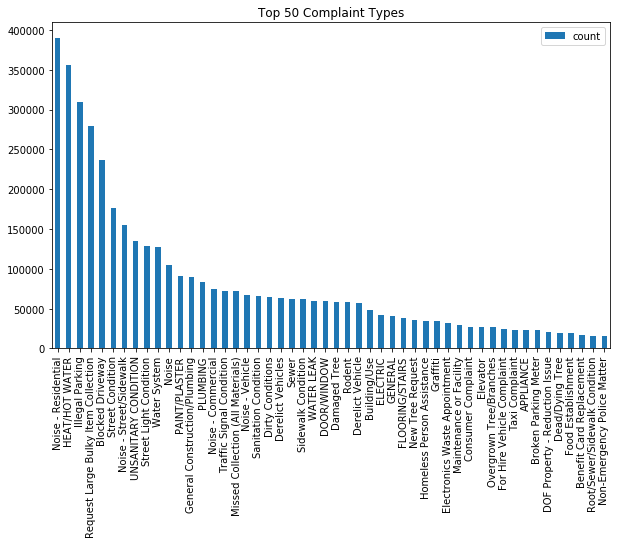

In [28]:
complaints_stat_df.head(50).plot.bar(figsize = (10,6), title = "Top 50 Complaint Types")

In [33]:
complaints_stat_df[complaints_stat_df['count']<10]

,count
Parking Card,9
Fire Alarm - New System,9
Rangehood,9
Legal Services Provider Complaint,9
Advocate-Commercial Exemptions,8
Interior Demo,8
Request Xmas Tree Collection,8
Squeegee,6
Outside Building,6
Advocate - RPIE,6


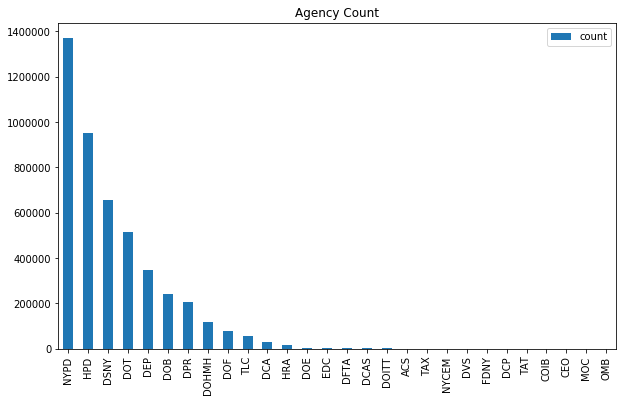

In [48]:
call_df['Agency'].value_counts().to_frame('count').plot.bar(figsize = (10,6), title = "Agency Count")

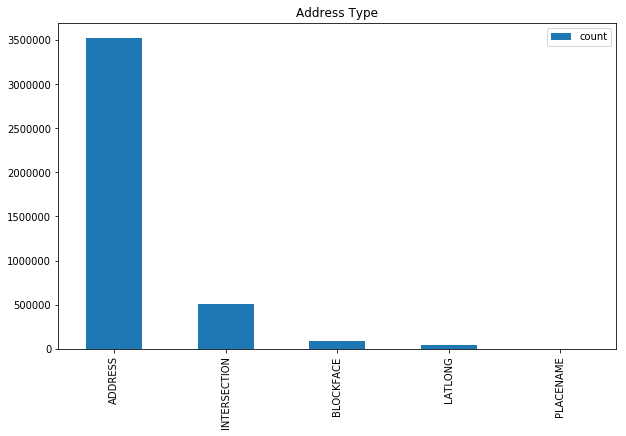

In [62]:
call_df['Address Type'].value_counts().to_frame('count').plot.bar(figsize = (10,6), title = "Address Type")

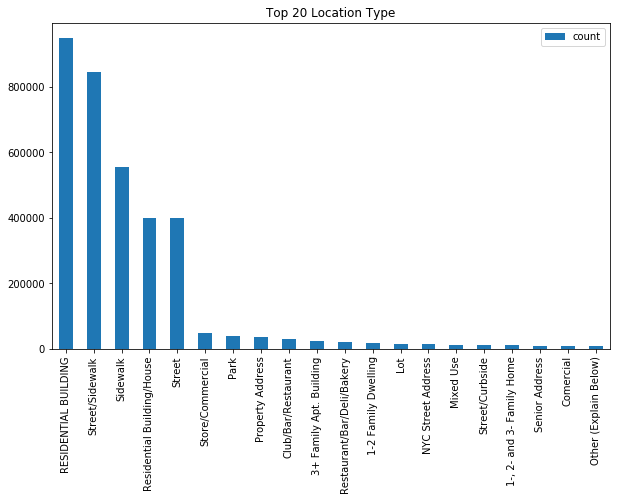

In [53]:
call_df['Location Type'].value_counts().to_frame('count').head(20).plot.bar(figsize = (10,6), title = "Top 20 Location Type")

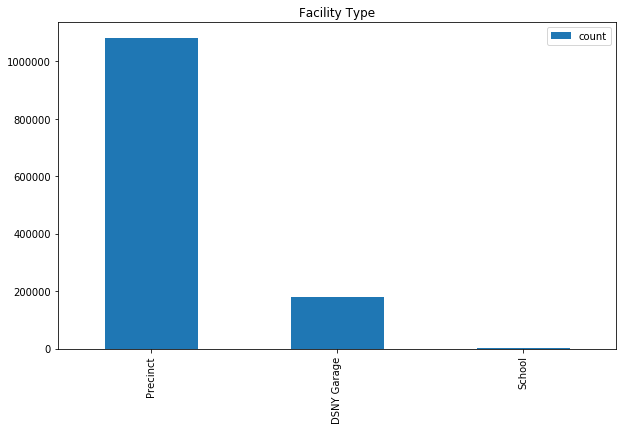

In [56]:
call_df['Facility Type'].value_counts().to_frame('count').plot.bar(figsize = (10,6), title = "Facility Type")

In [57]:
call_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'Descriptor_word_cnt'],
      dtype='object')

In [65]:
call_df['Park Facility Name'].value_counts().to_frame('count')

,count
Unspecified,4560108
Central Park,1216
Prospect Park,678
Riverside Park,495
Flushing Meadows Corona Park,299
Forest Park,276
Washington Square Park,266
Rockaway Beach Boardwalk,246
Sunset Park,243
Morningside Park,227


Missing information can be good indicaton for classifying the complaint type. For example, when 'Vehicle Type' is not missing, most of the "Complaint Type" is about "For Hire Vehicle Complaint".

In [60]:
call_df[call_df['Vehicle Type'].notnull()][['Descriptor', 'Complaint Type']]

,Descriptor,Complaint Type
307456,Driver Complaint,For Hire Vehicle Complaint
341763,Driver Complaint,For Hire Vehicle Complaint
484413,Driver Complaint,For Hire Vehicle Complaint
601617,Driver Complaint,For Hire Vehicle Complaint
729443,Driver Complaint,For Hire Vehicle Complaint
1038505,Driver Complaint,For Hire Vehicle Complaint
1040144,Driver Complaint,For Hire Vehicle Complaint
1072088,Car Service Company Complaint,For Hire Vehicle Complaint
1121381,Car Service Company Complaint,For Hire Vehicle Complaint
1168862,Driver Complaint,For Hire Vehicle Complaint


In [59]:
call_df['Vehicle Type'].value_counts().to_frame('count')

,count
Car Service,377
Ambulette / Paratransit,12
Green Taxi,8
Commuter Van,1


In [68]:
call_df['Landmark'].value_counts().to_frame('count')

,count
BROADWAY,2912
5 AVENUE,1784
PARSONS BOULEVARD,1323
7 AVENUE,1299
3 AVENUE,1289
2 AVENUE,1185
AMSTERDAM AVENUE,1182
DEKALB AVENUE,1098
GRAND CONCOURSE,1089
ST NICHOLAS AVENUE,1084


In [70]:
call_df['Landmark'].value_counts().to_frame('count')

,count
BROADWAY,2912
5 AVENUE,1784
PARSONS BOULEVARD,1323
7 AVENUE,1299
3 AVENUE,1289
2 AVENUE,1185
AMSTERDAM AVENUE,1182
DEKALB AVENUE,1098
GRAND CONCOURSE,1089
ST NICHOLAS AVENUE,1084


In [38]:
call_df.sample()['Descriptor']

4256390          GARBAGE/RECYCLING STORAGE
851188        Branch Cracked and Will Fall
3404062          Other (complaint details)
3607078                   Street Light Out
296713                    Driver Complaint
1816367          Leak (Use Comments) (WA2)
3355721               14 Derelict Vehicles
569475                     ENTIRE BUILDING
1883991                   Loud Music/Party
2118769                  Blocked Bike Lane
200763                         COOKING GAS
4356393                   Blocked Sidewalk
4071079                                NaN
4399475          GARBAGE/RECYCLING STORAGE
2306065    ER6 Comm. Recyc. (Comm. Tenant)
960474             Rodents/Insects/Garbage
3543004                    ENTIRE BUILDING
3428553                   Loud Music/Party
1450360                   Banging/Pounding
1421993                   Loud Music/Party
Name: Descriptor, dtype: object

In [40]:
call_df.shape

(4658607, 41)

In [41]:
call_df = call_df[call_df.Descriptor.notnull()]

In [42]:
call_df['Descriptor_word_cnt'] = call_df.Descriptor.str.split().map(len)

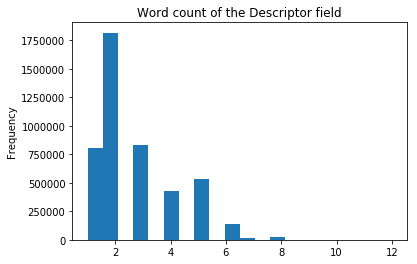

In [46]:
call_df['Descriptor_word_cnt'].plot.hist(bins= 20, title = "Word count of the Descriptor field")

In [73]:
#call_df.plot.scatter(x = 'Latitude', y = 'Longitude')

## check missing values

In [67]:
call_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'Descriptor_word_cnt'],
      dtype='object')

In [72]:
call_df.isnull().sum()/call_df.shape[0]

Unique Key                        0.000000
Created Date                      0.000000
Closed Date                       0.037358
Agency                            0.000000
Agency Name                       0.000000
Complaint Type                    0.000000
Descriptor                        0.000000
Location Type                     0.223540
Incident Zip                      0.040486
Incident Address                  0.135992
Street Name                       0.136046
Cross Street 1                    0.396829
Cross Street 2                    0.399212
Intersection Street 1             0.790913
Intersection Street 2             0.791532
Address Type                      0.096033
City                              0.047755
Landmark                          0.934342
Facility Type                     0.724618
Status                            0.000000
Due Date                          0.646480
Resolution Description            0.080289
Resolution Action Updated Date    0.019112
Community B

## Clean up the complaint type

In [79]:
complaints_stat_df.head(100)

,count
Noise - Residential,390125
HEAT/HOT WATER,355410
Illegal Parking,309536
Request Large Bulky Item Collection,279854
Blocked Driveway,236969
Street Condition,175810
Noise - Street/Sidewalk,155109
UNSANITARY CONDITION,134652
Street Light Condition,128407
Water System,127552


In [106]:
all_categories = complaints_stat_df.index.str.lower()

In [114]:
all_cat_words = [w for s in all_categories for w in s.split()]

In [136]:
Counter(all_cat_words).most_common(20)

[('misc.', 50),
 ('-', 40),
 ('condition', 18),
 ('complaint', 18),
 ('dof', 12),
 ('request', 11),
 ('property', 11),
 ('noise', 9),
 ('water', 9),
 ('parking', 9),
 ('taxi', 8),
 ('animal', 8),
 ('...', 8),
 ('and', 7),
 ("comments'", 7),
 ('illegal', 6),
 ('street', 6),
 ('sign', 6),
 ('collection', 5),
 ('unsanitary', 5)]

In [149]:
list(filter(lambda x: 'request' in x, all_categories))

['request large bulky item collection',
 'new tree request',
 'dof property - request copy',
 'litter basket / request',
 'hpd literature request',
 'dca / doh new license application request',
 'dof parking - request copy',
 'dof parking - request status',
 'oem literature request',
 'request xmas tree collection',
 'request changes - a.s.p.']

In [117]:
list(filter(lambda x: 'misc.' in x, all_categories))

['misc. comments../../../../....',
 'misc. comments..\\..\\..\\..\\....',
 'misc. comments>  bcc:bl0...',
 "misc. comments%}dt2pq'/&quo...",
 'misc. comments&nslookup...',
 "misc. comments'|echo y9v6fc...",
 "misc. comments88909845' or ...",
 'misc. comments"',
 "misc. comments')waitfor del...",
 "misc. comments',0)waitfor d...",
 "misc. comments'+sleep(20.to...",
 'c:\\windows\\win.ini misc. co...',
 "misc. comments'+(function()...",
 'misc. comments{${sleep(20)}}',
 'misc. comments]]>><',
 "misc. comments';declare @q ...",
 "misc. comments');declare @q...",
 'misc. comments|ping -n 21 1...',
 'misc. comments,(select*from...',
 "misc. comments52038737' or ...",
 "misc. comments69075347' or ...",
 "misc. comments'+(select*fro...",
 'misc. comments&ping -n ...',
 "misc. comments47876391' or ...",
 "misc. comments'+(select loa...",
 'misc. comments|ping -c 21 1...',
 "misc. comments'.sleep(20).'",
 '.../misc. comments',
 'misc. comments);declare @q ...',
 'misc. comments|nslookup -q=...'

In [137]:
complaints_stat_df.index[complaints_stat_df.index.str.contains('Animal')]

Index(['Animal Abuse', 'Animal in a Park', 'Unsanitary Animal Pvt Property',
       'Animal-Abuse', 'Illegal Animal Kept as Pet', 'Illegal Animal Sold',
       'Unsanitary Animal Facility', 'Animal Facility - No Permit',
       'Illegal Animal - Sold/Kept'],
      dtype='object')

In [84]:
complaints_stat_df.index[complaints_stat_df.index.str.contains(' - ')]

Index(['Noise - Residential', 'Noise - Street/Sidewalk', 'Noise - Commercial',
       'Noise - Vehicle', 'DOF Property - Reduction Issue',
       'DOF Property - Payment Issue', 'Street Sign - Damaged',
       'DOF Property - Request Copy', 'Street Sign - Missing',
       'DOF Property - Update Account', 'Noise - Park',
       'Housing - Low Income Senior', 'DOF Parking - Payment Issue',
       'Street Sign - Dangling', 'DOF Property - Owner Issue',
       'Noise - Helicopter', 'DOF Parking - Tax Exemption',
       'Noise - House of Worship', 'DOF Parking - Request Copy',
       'DOF Property - Property Value', 'DOF Parking - Request Status',
       'DOF Property - RPIE Issue', 'DOF Parking - DMV Clearance',
       'Advocate - Other', 'Highway Sign - Damaged',
       'Home Delivered Meal - Missed Delivery', 'Animal Facility - No Permit',
       'Highway Sign - Missing', 'Highway Sign - Dangling',
       'Fire Alarm - Reinspection', 'Advocate - Lien',
       'Fire Alarm - New System', '

In [103]:
big_catgories = np.unique(list((map(lambda x: x.split(' - ')[0], complaints_stat_df.index[complaints_stat_df.index.str.contains(' - ')]))))

In [104]:
for bc in big_catgories:
    sub_catgories = list(complaints_stat_df.index[complaints_stat_df.index.str.contains(bc)])
    print(f"{bc}: {sub_catgories}")

Advocate: ['Advocate-Prop Refunds/Credits', 'Advocate-Personal Exemptions', 'Taxpayer Advocate Inquiry', 'Advocate - Other', 'Advocate-Co-opCondo Abatement', 'Advocate-Property Value', 'Advocate - Lien', 'Advocate-Commercial Exemptions', 'Advocate - RPIE', 'Advocate-Business Tax', 'Advocate-SCRIE/DRIE', 'Advocate-Prop Class Incorrect', 'Advocate - Levy', 'Advocate-Foreclosure']
Animal Facility: ['Unsanitary Animal Facility', 'Animal Facility - No Permit']
DOF Parking: ['DOF Parking - Payment Issue', 'DOF Parking - Tax Exemption', 'DOF Parking - Request Copy', 'DOF Parking - Request Status', 'DOF Parking - DMV Clearance']
DOF Property: ['DOF Property - Reduction Issue', 'DOF Property - Payment Issue', 'DOF Property - Request Copy', 'DOF Property - Update Account', 'DOF Property - Owner Issue', 'DOF Property - Property Value', 'DOF Property - RPIE Issue']
Fire Alarm: ['Fire Alarm - Reinspection', 'Fire Alarm - New System', 'Fire Alarm - Modification', 'Fire Alarm - Replacement']
Highway 

In [101]:
len(np.unique(list((map(lambda x: x.split(' - ')[0], complaints_stat_df.index[complaints_stat_df.index.str.contains(' - ')])))))

14

In [102]:
complaints_stat_df.index[complaints_stat_df.index.str.contains('Fire Alarm')]

Index(['Fire Alarm - Reinspection', 'Fire Alarm - New System',
       'Fire Alarm - Modification', 'Fire Alarm - Replacement'],
      dtype='object')

In [76]:
complaints_stat_df[complaints_stat_df['count']<10]

,count
Parking Card,9
Fire Alarm - New System,9
Rangehood,9
Legal Services Provider Complaint,9
Advocate-Commercial Exemptions,8
Interior Demo,8
Request Xmas Tree Collection,8
Squeegee,6
Outside Building,6
Advocate - RPIE,6


In [126]:
call_df[call_df['Complaint Type'].str.startswith('Misc')]['Descriptor'].unique()

array(['Inspection Work Order (DOB)', 'FDNY Referral - Pilot',
       'Trauma Counseling'], dtype=object)

In [127]:
call_df[call_df['Complaint Type'].str.startswith('Misc')]['Complaint Type'].unique()

array(['Miscellaneous Categories', "Misc. Comments'||(select ex...",
       'Misc. Comments;declare @q v...', "Misc. Comments';declare @q ...",
       'Misc. Comments);declare @q ...', 'Misc. Comments,(select*from...',
       "Misc. Comments'+(select*fro...", "Misc. Comments'+(select loa...",
       "Misc. Comments'", "Misc. Comments');declare @q...",
       "Misc. Comments'(select*from...", "Misc. Comments' waitfor del...",
       "Misc. Comments52038737' or ...", "Misc. Comments' and '7835'=...",
       "Misc. Comments47876391' or ...", "Misc. Comments',0)waitfor d...",
       "Misc. Comments' and (select...", "Misc. Comments88909845' or ...",
       "Misc. Comments69075347' or ...", 'Misc. Comments"',
       'Misc. Commentseowljujfh8', "Misc. Comments')waitfor del...",
       "Misc. Comments' and 6049=60...", "Misc. Comments' and 7702=77...",
       "Misc. Comments' and '1618'=...", 'Misc. Commentso0w3r%>xb6...',
       "Misc. Comments'+eval(compil...", "Misc. Comments%}dt2pq'/&quo.

In [132]:
call_df.loc[call_df['Complaint Type'].str.startswith('Misc'), "Complaint Type"] 

29809      Miscellaneous Categories
30606      Miscellaneous Categories
30695      Miscellaneous Categories
31885      Miscellaneous Categories
33504      Miscellaneous Categories
                     ...           
4033824    Miscellaneous Categories
4033865    Miscellaneous Categories
4044156    Miscellaneous Categories
4044823    Miscellaneous Categories
4045074    Miscellaneous Categories
Name: Complaint Type, Length: 610, dtype: object

In [168]:
def clean_data(raw_data, misc_cat_threshold = 20):
    """ Clean the 311 dataset"""
    call_df = raw_data.copy()
    call_df = call_df[call_df.Descriptor.notnull()]
    call_df['Complaint Type'] = call_df['Complaint Type'].str.lower().str.replace('[^a-zA-Z-]', ' ')
    call_df = call_df[call_df['Complaint Type']!='']
    # there are werid long character names, i.e 'Misc. Comments;declare @q v...'
    call_df.loc[call_df['Complaint Type'].str.startswith('misc'), "Complaint Type"] = 'miscellaneous categories' 
    complaints_stat_df = call_df['Complaint Type'].value_counts().to_frame('count')
    # get the statistics of category frequequecy and rename the less common one as 'miscellaneous categories'
    misc_cats = complaints_stat_df[complaints_stat_df['count']<misc_cat_threshold].index
    call_df.loc[call_df['Complaint Type'].isin(misc_cats), "Complaint Type"]  = 'miscellaneous categories'
    # break down into subcategory (still kinda rough)
    all_categories = complaints_stat_df.index.str.lower()
    print('Total number of categories: ', len(all_categories))
    big_catgories = np.unique(list((map(lambda x: x.split(' - ')[0], complaints_stat_df.index[complaints_stat_df.index.str.contains(' - ')]))))
    cat_map = {}
    for bc in big_catgories:
        sub_catgories = list(complaints_stat_df.index[complaints_stat_df.index.str.contains(bc)])
        if len(sub_catgories) >1:
            for subc in sub_catgories:
                cat_map[subc] = bc
        #print(f"{bc}: {sub_catgories}")
        
    # other categorization based on heauristics
    water_cats = list(filter(lambda x: 'water' in x, all_categories)) + ['sewer', 'plumbing', 'general construction plumbing']
    for wc in water_cats:
        cat_map[wc] = 'water issues'
    unsanitary_cats = list(filter(lambda x: 'unsanitary' in x, all_categories)) + ['sanitation condition', 'dirty conditions']
    for wc in unsanitary_cats:
        cat_map[wc] = 'unsanitary issues'
    request_cats = list(filter(lambda x: 'request' in x, all_categories))

    # map to the big categories, if not replacing with the original one as the subcategory
    call_df['Main Category'] = call_df['Complaint Type'].map(lambda x: cat_map.get(x, x)) 
    print('Total number of main categories: ', call_df['Main Category'].nunique())
    print('Total number of sub categories: ', call_df['Complaint Type'].nunique())
    return call_df,cat_map

In [169]:
len(all_categories)

386

In [170]:
cleaned_call_df, cat_map = clean_data(call_df)

Total number of categories:  290
Total number of main categories:  149
Total number of sub categories:  191


In [171]:
cat_map

{'advocate-prop refunds credits': 'advocate',
 'advocate-personal exemptions': 'advocate',
 'taxpayer advocate inquiry': 'advocate',
 'advocate - other': 'advocate',
 'advocate-co-opcondo abatement': 'advocate',
 'advocate-property value': 'advocate',
 'advocate - lien': 'advocate',
 'advocate-commercial exemptions': 'advocate',
 'advocate - rpie': 'advocate',
 'advocate-business tax': 'advocate',
 'advocate-scrie drie': 'advocate',
 'advocate-prop class incorrect': 'advocate',
 'advocate - levy': 'advocate',
 'advocate-foreclosure': 'advocate',
 'dof parking - payment issue': 'dof parking',
 'dof parking - tax exemption': 'dof parking',
 'dof parking - request copy': 'dof parking',
 'dof parking - request status': 'dof parking',
 'dof parking - dmv clearance': 'dof parking',
 'dof property - reduction issue': 'dof property',
 'dof property - payment issue': 'dof property',
 'dof property - request copy': 'dof property',
 'dof property - update account': 'dof property',
 'dof property 

In [172]:
cleaned_call_df['Main Category'].value_counts().to_frame('count').head(50)

,count
water issues,809218
noise,804649
illegal parking,309536
request large bulky item collection,279854
unsanitary issues,269342
blocked driveway,236969
street condition,175810
street light condition,128407
paint plaster,90341
traffic signal condition,72553


In [173]:
cleaned_call_df.to_pickle("../cleaned_call_df.pkl")